# Unit Testing Self organising maps using KNN anomaly detection

In [1]:
import writefile_run as writefile_run

In [2]:
% matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import json
import os

# importing the bayesian changepoint main python file to detect changepoints
from anomaly_detectors.som_knn_detector import som_knn_wrapper as som_wrapper
from anomaly_detectors.utils import reader_helper
from anomaly_detectors.utils import csv_prep_for_reader as csv_helper
from anomaly_detectors.reader_writer import db_properties as db_properties
from anomaly_detectors.reader_writer import writer_configs as writer_configs

import warnings
warnings.filterwarnings('ignore')

In [4]:
# %%writefile_run bayeschangept_sprint1.py -a
'''
Arguments for reader module to get data from opentsdb
This is included for now just for testing, later the main function will take json as direct input
'''

assetno = ['TSFAD_A1']
con = '52.224.236.31:4242'
src_type =  'opentsdb'
param = ['ec2_cpu_utilization_5f5533']
# param = ['ec2_cpu_utilization_ac20cd']

# from_timestamp = 1392388020
# to_timestamp = 1393597320
# param=['ec2_cpu_utilization_5f5533', 'rds_cpu_utilization_cc0c53']
from_timestamp=1392388200
to_timestamp=1393597320
# from_timestamp =1396448940
# to_timestamp = 1397659740

In [5]:
reader_kwargs= lambda:{
            'assetno':['TSFAD_A1'],
            'from_timestamp':from_timestamp,
            'to_timestamp':to_timestamp,
            'con':con,
            'para_list':param,
            'source_type':src_type,
            'table_name':'',
            'qry_str':'',
            'impute_fill_method':'forward',
            'down_sampling_method':None,
            'down_sampling_window':None,
            'freq':None,
            'resample_fill_method':None,
            'to_resample':None,
            'to_impute':True,
}

model_input_args = lambda :{
    'network_shape':(8,8),
    'input_feature_size':None,
    'time_constant':None,
    'minNumPerBmu':2,
    'no_of_neighbours':3,
    'init_radius':0.4,
    'init_learning_rate':0.01,
    'N':100,    
    'diff_order':1
}

training_args = lambda:{
            'is_train':True,
            'epochs':5,
            'batch_size':4,
            'to_plot':True,
            'test_frac':0.2
        }


        
eval_args = lambda: {
    'model_path':'',
    'to_plot':True,
    'anom_thres':3.0
}

In [6]:
keys = list(model_input_args().keys())+list(training_args().keys())+list(eval_args().keys())

In [7]:
keys

['network_shape',
 'input_feature_size',
 'time_constant',
 'minNumPerBmu',
 'no_of_neighbours',
 'init_radius',
 'init_learning_rate',
 'N',
 'diff_order',
 'is_train',
 'epochs',
 'batch_size',
 'to_plot',
 'test_frac',
 'model_path',
 'to_plot',
 'anom_thres']

## Test for modes :
#### Testing three different modes of the program
* First training and for testing three different modes are tested and the output is shown below

In [8]:
def get_kwargs():
    return model_input_args(),training_args(),eval_args()

In [9]:
reader_kwargs1= reader_kwargs()
json_data = reader_helper.read(reader_kwargs=reader_kwargs1)
model_input_args1,training_args1,eval_args1 = get_kwargs()
training_args1['to_plot'] = False

for i in range(3):
    mode = som_wrapper.mode_options[i]
    print("\nTesting mode option : {}\n".format(mode))
    training_args1['to_plot']=False
    train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},json_data=json_data))
    eval_args1['anom_thres'] = 3
    eval_args1['model_path'] = train_res['models'][0][assetno[0]]
#     json_data = reader_helper.read(reader_kwargs1)
    eval_args1['to_plot']=False
    test_res = som_wrapper.evaluate(**eval_args1,json_data=json_data,mode=som_wrapper.mode_options[i])
    print(test_res)

http://52.224.236.31:4242/api/query?start=1392388200&end=1393597320&ms=true&m=max:none:ec2_cpu_utilization_5f5533{AssetNo=TSFAD_A1}

Testing mode option : detect only

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533
timestamp                                          
1392388320000  TSFAD_A1                    0.325390
1392388620000  TSFAD_A1                   -0.433345
1392388920000  TSFAD_A1                    1.269160
1392389220000  TSFAD_A1                    0.838187
1392389520000  TSFAD_A1                    0.436504

Shape of the Entire dataset : torch.Size([4031, 1])

torch.float64
Shape of Training dataset :torch.Size([3225, 1]) and Test dataset :torch.Size([807, 1])

Network dimensions are 8 x 7 


Shape of differenced Training data : (3224, 1)

Epoch : 0 completed

Epoch : 1 completed

Epoch : 2 completed

Epoch : 3 completed

Epoch : 4 completed


 Training successfully comple

## Test 1 : 
#### Testing with parameters being empty quotes

In [10]:
reader_kwargs1= reader_kwargs()
json_data = reader_helper.read(reader_kwargs=reader_kwargs1)
model_input_args1,training_args1,eval_args1 = get_kwargs()

http://52.224.236.31:4242/api/query?start=1392388200&end=1393597320&ms=true&m=max:none:ec2_cpu_utilization_5f5533{AssetNo=TSFAD_A1}


## Testing on model_input_args

In [11]:
for key in list(model_input_args1.keys()):
    print("\nGiving {} parameter : ''\n".format(key))
    model_input_args1 = model_input_args()
    model_input_args1[key] = ''
    training_args1['to_plot']=False
    train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},json_data=json_data))
    print(train_res)


Giving network_shape parameter : ''

{'code': '400', 'status': 'Bad Request', 'message': "should be of type <class 'tuple'>", 'data': {'argument': 'som_shape', 'value': ''}}

Giving input_feature_size parameter : ''

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533
timestamp                                          
1392388320000  TSFAD_A1                    0.325390
1392388620000  TSFAD_A1                   -0.433345
1392388920000  TSFAD_A1                    1.269160
1392389220000  TSFAD_A1                    0.838187
1392389520000  TSFAD_A1                    0.436504

Shape of the Entire dataset : torch.Size([4031, 1])

torch.float64
Shape of Training dataset :torch.Size([3225, 1]) and Test dataset :torch.Size([807, 1])

Network dimensions are 8 x 7 


Shape of differenced Training data : (3224, 1)

Epoch : 0 completed

Epoch : 1 completed

Epoch : 2 completed

Epoch : 3 completed

E

## Testing on training args

In [12]:
model_input_args1 = model_input_args()

for key in list(training_args().keys()):
    training_args1 = training_args()
    training_args1[key] = ''
#     eval_args1['to_plot']=False
    training_args1['to_plot']=False
    train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},json_data=json_data))
    print(train_res)

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533
timestamp                                          
1392388320000  TSFAD_A1                    0.325390
1392388620000  TSFAD_A1                   -0.433345
1392388920000  TSFAD_A1                    1.269160
1392389220000  TSFAD_A1                    0.838187
1392389520000  TSFAD_A1                    0.436504

Shape of the Entire dataset : torch.Size([4031, 1])

torch.float64
Shape of Training dataset :torch.Size([3225, 1]) and Test dataset :torch.Size([807, 1])

Network dimensions are 8 x 7 


Shape of differenced Training data : (3224, 1)

Epoch : 0 completed

Epoch : 1 completed

Epoch : 2 completed

Epoch : 3 completed

Epoch : 4 completed


 Training successfully completed 


Saved model : som_trained_model_ec2cpuutilization5f5533_TSFAD_A1_1530795237636 in ../../Anomaly_Detection_Models/Machine_Learning_Models,
Last Checkpointed at: 1

## Testing on evaluation args

In [13]:
training_args1 = training_args()
model_input_args1 = model_input_args()
training_args1['to_plot']=False
train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},json_data=json_data))
print(train_res)

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533
timestamp                                          
1392388320000  TSFAD_A1                    0.325390
1392388620000  TSFAD_A1                   -0.433345
1392388920000  TSFAD_A1                    1.269160
1392389220000  TSFAD_A1                    0.838187
1392389520000  TSFAD_A1                    0.436504

Shape of the Entire dataset : torch.Size([4031, 1])

torch.float64
Shape of Training dataset :torch.Size([3225, 1]) and Test dataset :torch.Size([807, 1])

Network dimensions are 8 x 7 


Shape of differenced Training data : (3224, 1)

Epoch : 0 completed

Epoch : 1 completed

Epoch : 2 completed

Epoch : 3 completed

Epoch : 4 completed


 Training successfully completed 


Saved model : som_trained_model_ec2cpuutilization5f5533_TSFAD_A1_1530795239401 in ../../Anomaly_Detection_Models/Machine_Learning_Models,
Last Checkpointed at: 1

In [14]:
for key in list(eval_args().keys()):
    eval_args1 = eval_args()
    eval_args1['model_path'] = train_res['models'][0][assetno[0]]
    eval_args1[key] = ''
#     json_data = reader_helper.read(reader_kwargs1)
    eval_args1['to_plot']=False
    test_res = som_wrapper.evaluate(**eval_args1,json_data=json_data)
    print(test_res)

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533
timestamp                                          
1392388320000  TSFAD_A1                    0.325390
1392388620000  TSFAD_A1                   -0.433345
1392388920000  TSFAD_A1                    1.269160
1392389220000  TSFAD_A1                    0.838187
1392389520000  TSFAD_A1                    0.436504

Shape of the Entire dataset : torch.Size([4031, 1])

{"code": "500", "status": "Unknown Exception", "message": "[Errno 2] No such file or directory: ''"}
Data reader initialised 

Getting the dataset from the reader....



Traceback (most recent call last):
  File "c:\users\tr1109\intrototimeseries\tsfad\rohithram\anomaly_detectors\som_knn_detector\som_knn_wrapper.py", line 330, in evaluate
    anom_indexes = anomaly_detector.detect_anomalies()
  File "c:\users\tr1109\intrototimeseries\tsfad\rohithram\anomaly_detectors\som_knn_detector\som_knn_detector.py", line 134, in detect_anomalies
    eval_net = load_model(model_path)
  File "c:\users\tr1109\intrototimeseries\tsfad\rohithram\anomaly_detectors\som_knn_detector\som_knn_detector.py", line 70, in load_model
    filehandler = open(filepath, 'rb')
FileNotFoundError: [Errno 2] No such file or directory: ''


Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533
timestamp                                          
1392388320000  TSFAD_A1                    0.325390
1392388620000  TSFAD_A1                   -0.433345
1392388920000  TSFAD_A1                    1.269160
1392389220000  TSFAD_A1                    0.838187
1392389520000  TSFAD_A1                    0.436504

Shape of the Entire dataset : torch.Size([4031, 1])

Input data's shape: (4031, 1)
Differenced data shape (4030, 1)
(4030,)

No of anomalies detected : 20, Fraction of data detected as anomaly : 0.004961548002976929

 No of Anomalies detected = 20
{"header": {"code": "200", "status": "OK"}, "body": [{"asset": "TSFAD_A1", "anomalies": [{"name": "ec2_cpu_utilization_5f5533", "datapoints": [{"from_timestamp": 1392472920000, "to_timestamp": 1392472920000, "anomaly_timestamp": [1392472920000], "anomaly_code": "som"}, {"from_timestamp": 1392473220000, "to_timestamp": 1392473220000, "anomaly_timestamp": [1

## Test 2 :
#### Testing missing parameters : 
* Since only model path is required arg, it doesn't throw any error when we don't pass other evalution args since they are optional

#### Model input args

In [15]:
for key in list(model_input_args1.keys()):
    print("\nGiving {} parameter : ''\n".format(key))
    model_input_args1 = model_input_args()
    del model_input_args1[key]
    training_args1['to_plot']=False
    train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},json_data=json_data))
    print(train_res)


Giving network_shape parameter : ''

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533
timestamp                                          
1392388320000  TSFAD_A1                    0.325390
1392388620000  TSFAD_A1                   -0.433345
1392388920000  TSFAD_A1                    1.269160
1392389220000  TSFAD_A1                    0.838187
1392389520000  TSFAD_A1                    0.436504

Shape of the Entire dataset : torch.Size([4031, 1])

torch.float64
Shape of Training dataset :torch.Size([3225, 1]) and Test dataset :torch.Size([807, 1])

Network dimensions are 8 x 7 


Shape of differenced Training data : (3224, 1)

Epoch : 0 completed

Epoch : 1 completed

Epoch : 2 completed

Epoch : 3 completed

Epoch : 4 completed


 Training successfully completed 


Saved model : som_trained_model_ec2cpuutilization5f5533_TSFAD_A1_1530795241550 in ../../Anomaly_Detection_Models/Machine_Le


 Training successfully completed 


Saved model : som_trained_model_ec2cpuutilization5f5533_TSFAD_A1_1530795246368 in ../../Anomaly_Detection_Models/Machine_Learning_Models,
Last Checkpointed at: 1530795246368

{'header': {'code': '200', 'status': 'OK'}, 'models': [{'TSFAD_A1': '../../Anomaly_Detection_Models/Machine_Learning_Models\\som_trained_model_ec2cpuutilization5f5533_TSFAD_A1_1530795246368'}]}

Giving N parameter : ''

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533
timestamp                                          
1392388320000  TSFAD_A1                    0.325390
1392388620000  TSFAD_A1                   -0.433345
1392388920000  TSFAD_A1                    1.269160
1392389220000  TSFAD_A1                    0.838187
1392389520000  TSFAD_A1                    0.436504

Shape of the Entire dataset : torch.Size([4031, 1])

torch.float64
Shape of Training dataset :torch.Size([3

#### Training args


Giving is_train parameter : ''

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533
timestamp                                          
1392388320000  TSFAD_A1                    0.325390
1392388620000  TSFAD_A1                   -0.433345
1392388920000  TSFAD_A1                    1.269160
1392389220000  TSFAD_A1                    0.838187
1392389520000  TSFAD_A1                    0.436504

Shape of the Entire dataset : torch.Size([4031, 1])

torch.float64
Shape of Training dataset :torch.Size([3225, 1]) and Test dataset :torch.Size([807, 1])

Network dimensions are 8 x 7 


Shape of differenced Training data : (3224, 1)

Epoch : 0 completed

Epoch : 1 completed

Epoch : 2 completed

Epoch : 3 completed

Epoch : 4 completed


 Training successfully completed 


Saved model : som_trained_model_ec2cpuutilization5f5533_TSFAD_A1_1530795249096 in ../../Anomaly_Detection_Models/Machine_Learnin

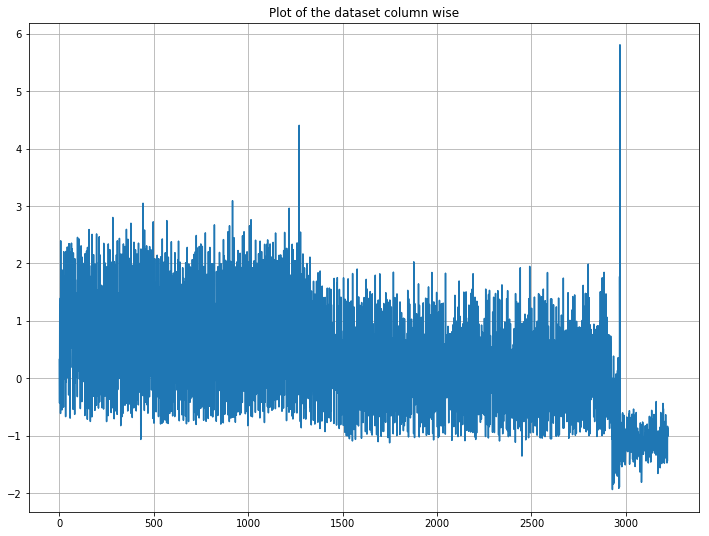

Network dimensions are 8 x 7 


Shape of differenced Training data : (3224, 1)

Epoch : 0 completed

Epoch : 1 completed

Epoch : 2 completed

Epoch : 3 completed


 Training successfully completed 


Saved model : som_trained_model_ec2cpuutilization5f5533_TSFAD_A1_1530795251824 in ../../Anomaly_Detection_Models/Machine_Learning_Models,
Last Checkpointed at: 1530795251824

{'header': {'code': '200', 'status': 'OK'}, 'models': [{'TSFAD_A1': '../../Anomaly_Detection_Models/Machine_Learning_Models\\som_trained_model_ec2cpuutilization5f5533_TSFAD_A1_1530795251824'}]}

Giving test_frac parameter : ''

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533
timestamp                                          
1392388320000  TSFAD_A1                    0.325390
1392388620000  TSFAD_A1                   -0.433345
1392388920000  TSFAD_A1                    1.269160
1392389220000  TSFAD_A1                 

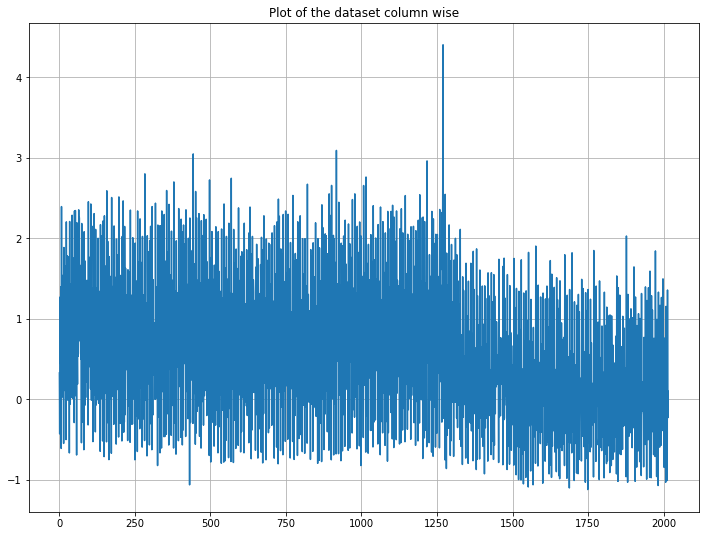

Network dimensions are 8 x 7 


Shape of differenced Training data : (2015, 1)

Epoch : 0 completed

Epoch : 1 completed

Epoch : 2 completed

Epoch : 3 completed


 Training successfully completed 


Saved model : som_trained_model_ec2cpuutilization5f5533_TSFAD_A1_1530795252813 in ../../Anomaly_Detection_Models/Machine_Learning_Models,
Last Checkpointed at: 1530795252813

{'header': {'code': '200', 'status': 'OK'}, 'models': [{'TSFAD_A1': '../../Anomaly_Detection_Models/Machine_Learning_Models\\som_trained_model_ec2cpuutilization5f5533_TSFAD_A1_1530795252813'}]}


In [16]:
for key in list(training_args1.keys()):
    print("\nGiving {} parameter : ''\n".format(key))
    model_input_args1 = model_input_args()
    del training_args1[key]
#     training_args1['to_plot']=False
    train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},json_data=json_data))
    print(train_res)

#### Evaluation args

In [17]:
for key in list(eval_args().keys()):
    eval_args1 = eval_args()
    del eval_args1[key]
    eval_args1['model_path'] = train_res['models'][0][assetno[0]]

#     json_data = reader_helper.read(reader_kwargs1)
    eval_args1['to_plot']=False
    test_res = som_wrapper.evaluate(**eval_args1,json_data=json_data)
    print(test_res)

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533
timestamp                                          
1392388320000  TSFAD_A1                    0.325390
1392388620000  TSFAD_A1                   -0.433345
1392388920000  TSFAD_A1                    1.269160
1392389220000  TSFAD_A1                    0.838187
1392389520000  TSFAD_A1                    0.436504

Shape of the Entire dataset : torch.Size([4031, 1])

Input data's shape: (4031, 1)
Differenced data shape (4030, 1)
(4030,)

No of anomalies detected : 19, Fraction of data detected as anomaly : 0.004713470602828083

 No of Anomalies detected = 19
{"header": {"code": "200", "status": "OK"}, "body": [{"asset": "TSFAD_A1", "anomalies": [{"name": "ec2_cpu_utilization_5f5533", "datapoints": [{"from_timestamp": 1392472920000, "to_timestamp": 1392472920000, "anomaly_timestamp": [1392472920000], "anomaly_code": "som"}, {"from_timestamp": 13

## Test 3:
#### Testing parameter type mismatch 

### Mismatched params arguments

In [18]:
train_vals = {'batch_size': 4.5,
             'epochs': 5.5,
             'is_train': 'True',
             'test_frac': 3.0,
             'to_plot': 'True'}

model_vals = {'N': '100',
             'diff_order': 1.4,
             'init_learning_rate': 1,
             'init_radius': 'f',
             'input_feature_size': 'ff',
             'minNumPerBmu': 2,
             'network_shape': ('8', 8),
             'no_of_neighbours': 34.4,
             'time_constant': 'None'}

eval_vals = {
            'model_path':34,
            'to_plot':'True',
            'anom_thres':4
}

####  Testing training args


Giving is_train parameter : True

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533
timestamp                                          
1392388320000  TSFAD_A1                    0.325390
1392388620000  TSFAD_A1                   -0.433345
1392388920000  TSFAD_A1                    1.269160
1392389220000  TSFAD_A1                    0.838187
1392389520000  TSFAD_A1                    0.436504

Shape of the Entire dataset : torch.Size([4031, 1])

torch.float64
Shape of Training dataset :torch.Size([3225, 1]) and Test dataset :torch.Size([807, 1])

Dataset has 3225 rows 1 columns


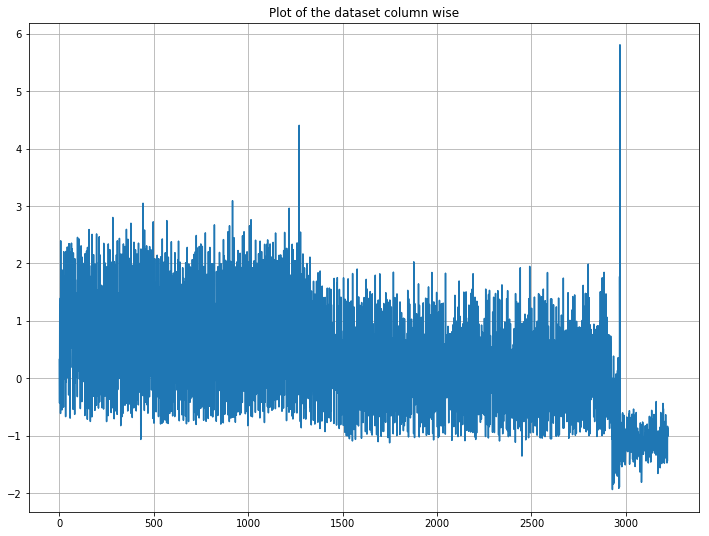

Network dimensions are 8 x 7 


Shape of differenced Training data : (3224, 1)

Epoch : 0 completed

Epoch : 1 completed

Epoch : 2 completed

Epoch : 3 completed

Epoch : 4 completed


 Training successfully completed 


Saved model : som_trained_model_ec2cpuutilization5f5533_TSFAD_A1_1530795255825 in ../../Anomaly_Detection_Models/Machine_Learning_Models,
Last Checkpointed at: 1530795255825

{'header': {'code': '200', 'status': 'OK'}, 'models': [{'TSFAD_A1': '../../Anomaly_Detection_Models/Machine_Learning_Models\\som_trained_model_ec2cpuutilization5f5533_TSFAD_A1_1530795255825'}]}

Giving epochs parameter : 5.5

{'code': '400', 'status': 'Bad Request', 'message': "should be of type <class 'int'>", 'data': {'argument': 'epochs', 'value': 5.5}}

Giving batch_size parameter : 4.5

{'code': '400', 'status': 'Bad Request', 'message': "should be of type <class 'int'>", 'data': {'argument': 'batch_size', 'value': 4.5}}

Giving to_plot parameter : True

{'code': '400', 'status': 'Bad Reques

Traceback (most recent call last):
  File "c:\users\tr1109\intrototimeseries\tsfad\rohithram\anomaly_detectors\som_knn_detector\som_knn_wrapper.py", line 204, in train
    model_path = (anomaly_detector.detect_anomalies())
  File "c:\users\tr1109\intrototimeseries\tsfad\rohithram\anomaly_detectors\som_knn_detector\som_knn_detector.py", line 119, in detect_anomalies
    to_plot=self.training_args['to_plot'])
  File "c:\users\tr1109\intrototimeseries\tsfad\rohithram\anomaly_detectors\som_knn_detector\som_knn_detector.py", line 198, in process_data
    train_data,test_data = split_the_data(data_set,test_frac=test_frac)
  File "c:\users\tr1109\intrototimeseries\tsfad\rohithram\anomaly_detectors\som_knn_detector\som_knn_detector.py", line 172, in split_the_data
    train_data = data[0:int(np.ceil((1-test_frac)*data[:,].shape[0])),:]
  File "c:\users\tr1109\intrototimeseries\tsfad\rohithram\anomaly_detectors\som_knn_detector\som_knn_detector.py", line 162, in __getitem__
    sample = self.da

In [19]:
for i,key in enumerate(list(training_args().keys())):
    print("\nGiving {} parameter : {}\n".format(key,train_vals[key]))
    model_input_args1 = model_input_args()
    training_args1 = training_args()
    training_args1[key] = train_vals[key]
    train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},json_data=json_data))
    print(train_res)

####  Testing model input args


Giving network_shape parameter : ('8', 8)

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533
timestamp                                          
1392388320000  TSFAD_A1                    0.325390
1392388620000  TSFAD_A1                   -0.433345
1392388920000  TSFAD_A1                    1.269160
1392389220000  TSFAD_A1                    0.838187
1392389520000  TSFAD_A1                    0.436504

Shape of the Entire dataset : torch.Size([4031, 1])

torch.float64
Shape of Training dataset :torch.Size([3225, 1]) and Test dataset :torch.Size([807, 1])

Dataset has 3225 rows 1 columns


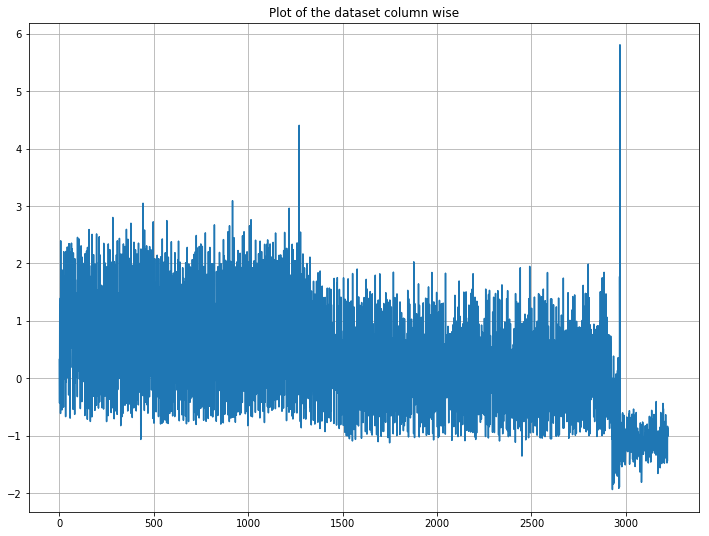

Network dimensions are 8 x 7 

{'code': '500', 'status': 'Unknown Exception', 'message': 'an integer is required (got type str)'}

Giving input_feature_size parameter : ff

Data reader initialised 

Getting the dataset from the reader....



Traceback (most recent call last):
  File "c:\users\tr1109\intrototimeseries\tsfad\rohithram\anomaly_detectors\som_knn_detector\som_knn_wrapper.py", line 204, in train
    model_path = (anomaly_detector.detect_anomalies())
  File "c:\users\tr1109\intrototimeseries\tsfad\rohithram\anomaly_detectors\som_knn_detector\som_knn_detector.py", line 123, in detect_anomalies
    net = create_cum_train_som(train_data,self.model_input_args,self.training_args)
  File "c:\users\tr1109\intrototimeseries\tsfad\rohithram\anomaly_detectors\som_knn_detector\som_knn_detector.py", line 403, in create_cum_train_som
    model = som_knn_module.Som_model(**model_input_args)
  File "c:\users\tr1109\intrototimeseries\tsfad\rohithram\anomaly_detectors\som_knn_detector\som_knn_module.py", line 29, in __init__
    self.weights = torch.rand((*self.shape,self.feature_size),dtype=torch.float64)
TypeError: an integer is required (got type str)


Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533
timestamp                                          
1392388320000  TSFAD_A1                    0.325390
1392388620000  TSFAD_A1                   -0.433345
1392388920000  TSFAD_A1                    1.269160
1392389220000  TSFAD_A1                    0.838187
1392389520000  TSFAD_A1                    0.436504

Shape of the Entire dataset : torch.Size([4031, 1])

torch.float64
Shape of Training dataset :torch.Size([3225, 1]) and Test dataset :torch.Size([807, 1])

Dataset has 3225 rows 1 columns


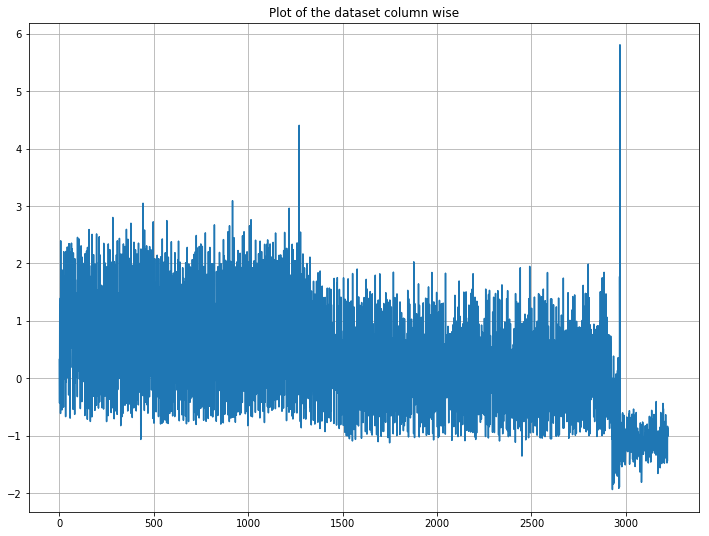

Network dimensions are 8 x 7 


Shape of differenced Training data : (3224, 1)

Epoch : 0 completed

Epoch : 1 completed

Epoch : 2 completed

Epoch : 3 completed

Epoch : 4 completed


 Training successfully completed 


Saved model : som_trained_model_ec2cpuutilization5f5533_TSFAD_A1_1530795258295 in ../../Anomaly_Detection_Models/Machine_Learning_Models,
Last Checkpointed at: 1530795258295

{'header': {'code': '200', 'status': 'OK'}, 'models': [{'TSFAD_A1': '../../Anomaly_Detection_Models/Machine_Learning_Models\\som_trained_model_ec2cpuutilization5f5533_TSFAD_A1_1530795258295'}]}

Giving time_constant parameter : None

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533
timestamp                                          
1392388320000  TSFAD_A1                    0.325390
1392388620000  TSFAD_A1                   -0.433345
1392388920000  TSFAD_A1                    1.269160
1392389220000

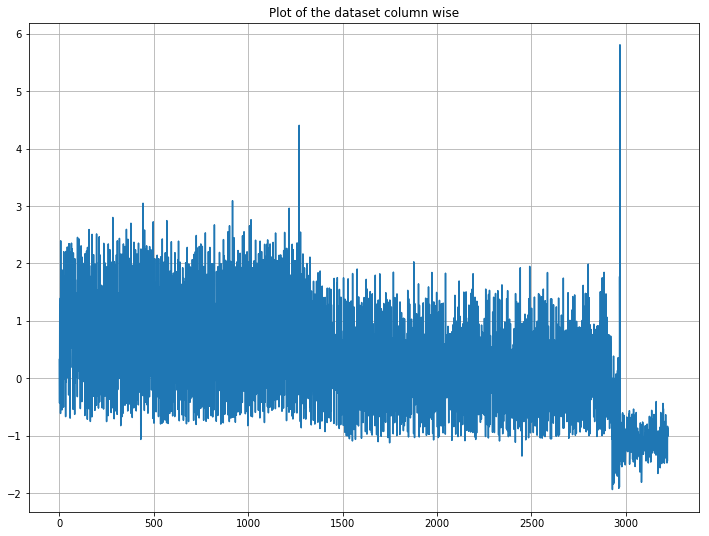

Network dimensions are 8 x 7 


Shape of differenced Training data : (3224, 1)

Epoch : 0 completed

Epoch : 1 completed

Epoch : 2 completed

Epoch : 3 completed

Epoch : 4 completed


 Training successfully completed 


Saved model : som_trained_model_ec2cpuutilization5f5533_TSFAD_A1_1530795259462 in ../../Anomaly_Detection_Models/Machine_Learning_Models,
Last Checkpointed at: 1530795259462

{'header': {'code': '200', 'status': 'OK'}, 'models': [{'TSFAD_A1': '../../Anomaly_Detection_Models/Machine_Learning_Models\\som_trained_model_ec2cpuutilization5f5533_TSFAD_A1_1530795259462'}]}

Giving minNumPerBmu parameter : 2

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533
timestamp                                          
1392388320000  TSFAD_A1                    0.325390
1392388620000  TSFAD_A1                   -0.433345
1392388920000  TSFAD_A1                    1.269160
1392389220000  TS

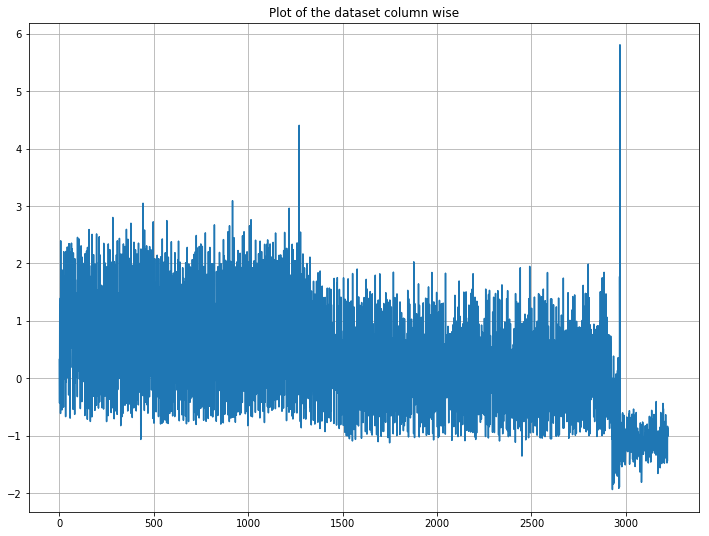

Network dimensions are 8 x 7 


Shape of differenced Training data : (3224, 1)

Epoch : 0 completed

Epoch : 1 completed

Epoch : 2 completed

Epoch : 3 completed

Epoch : 4 completed


 Training successfully completed 


Saved model : som_trained_model_ec2cpuutilization5f5533_TSFAD_A1_1530795260525 in ../../Anomaly_Detection_Models/Machine_Learning_Models,
Last Checkpointed at: 1530795260525

{'header': {'code': '200', 'status': 'OK'}, 'models': [{'TSFAD_A1': '../../Anomaly_Detection_Models/Machine_Learning_Models\\som_trained_model_ec2cpuutilization5f5533_TSFAD_A1_1530795260525'}]}

Giving no_of_neighbours parameter : 34.4

{'code': '400', 'status': 'Bad Request', 'message': "should be of type <class 'int'>", 'data': {'argument': 'no_of_neighbors', 'value': 34.4}}

Giving init_radius parameter : f

{'code': '400', 'status': 'Bad Request', 'message': "should be of type <class 'float'>", 'data': {'argument': 'initial_radius', 'value': 'f'}}

Giving init_learning_rate parameter : 1

{'c

In [20]:
for i,key in enumerate(list(model_input_args().keys())):
    print("\nGiving {} parameter : {}\n".format(key,model_vals[key]))
    training_args1 = training_args()
    model_input_args1 = model_input_args()
    model_input_args1[key] = model_vals[key]
    train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},json_data=json_data))
    print(train_res)

#### Testing eval args

In [21]:
training_args1 = training_args()
model_input_args1 = model_input_args()
training_args1['to_plot'] = False

train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},json_data=json_data))

Data reader initialised 

Getting the dataset from the reader....

Data of Asset no: TSFAD_A1 
                 assetno  ec2_cpu_utilization_5f5533
timestamp                                          
1392388320000  TSFAD_A1                    0.325390
1392388620000  TSFAD_A1                   -0.433345
1392388920000  TSFAD_A1                    1.269160
1392389220000  TSFAD_A1                    0.838187
1392389520000  TSFAD_A1                    0.436504

Shape of the Entire dataset : torch.Size([4031, 1])

torch.float64
Shape of Training dataset :torch.Size([3225, 1]) and Test dataset :torch.Size([807, 1])

Network dimensions are 8 x 7 


Shape of differenced Training data : (3224, 1)

Epoch : 0 completed

Epoch : 1 completed

Epoch : 2 completed

Epoch : 3 completed

Epoch : 4 completed


 Training successfully completed 


Saved model : som_trained_model_ec2cpuutilization5f5533_TSFAD_A1_1530795261506 in ../../Anomaly_Detection_Models/Machine_Learning_Models,
Last Checkpointed at: 1

In [22]:
eval_vals

{'anom_thres': 4, 'model_path': 34, 'to_plot': 'True'}

In [23]:
for key in list(eval_args().keys()):
    eval_args1 = eval_args()
    eval_args1[key] = eval_vals[key]

    test_res = som_wrapper.evaluate(**eval_args1,json_data=json_data)
    print(test_res)

{"code": "400", "status": "Bad Request", "message": "should be of type <class 'str'>", "data": {"argument": "model_path", "value": 34}}
{"code": "400", "status": "Bad Request", "message": "should be of type <class 'bool'>", "data": {"argument": "to_plot", "value": "True"}}
{"code": "400", "status": "Bad Request", "message": "should be of type <class 'float'>", "data": {"argument": "anom_thres", "value": 4}}


### User Defined Test Case:
#### Testing the data missing case

In [27]:
reader_kwargs1 = reader_kwargs()
reader_kwargs1['from_timestamp'] = int(2**40)

json_data = reader_helper.read(reader_kwargs=reader_kwargs1)

model_input_args1 = model_input_args()
training_args1 = training_args()
training_args1['to_plot']=False
train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},json_data=json_data))
print(train_res)

Data reader initialised 

{'code': '400', 'status': 'Bad Request', 'message': 'Expecting value: line 1 column 1 (char 0),from_timestamp has to be less than to_timestamp!', 'data': {}}


## Test 4:
#### Testing Algorithm Logic :
* Running the algorithm for different values of probability thresholds
* so expected o/p behaviour expected is as we increase the probability threshold the no of anomaly detected reduces and reaches zero when set to $1.0$
* Default threshold is $0.5$

In [25]:
reader_kwargs1 = csv_helper.get_csv_kwargs()
json_data = reader_helper.read(reader_kwargs=reader_kwargs1)
algo_kwargs1 = algo_kwargs()

pthreses = [0.5,0.01,0.99]

for i,pthres in enumerate(pthreses):
    algo_kwargs1['thres_prob']=pthres
    res = bayeschangept.main(**algo_kwargs1,json_data=json_data)
    print(res)

NameError: name 'algo_kwargs' is not defined

#### Observe the effect of expected_run_length on the algorithm

In [ ]:
reader_kwargs1 = csv_helper.get_csv_kwargs()
json_data = reader_helper.read(reader_kwargs=reader_kwargs1)
algo_kwargs1 = algo_kwargs()
algo_kwargs1['thres_prob'] = 0.5
mean_run_lens = [0,100,10000]
for i,mean_run_len in enumerate(mean_run_lens):
    print('\n Anomaly detection for expected run length  = {}\n'.format(mean_run_len))
    algo_kwargs1['expected_run_length']=mean_run_len
    res = bayeschangept.main(**algo_kwargs1,json_data=json_data)
    print(res)

##### Results:
* As we observed that when expected run length given zero. the algo stops and throws an zero division error as expected/
* Then as we increase it from zero, we observed that interval between changepoints increased

## Test 5:
#### Testing Algorithm tuning :
* Trying to change the parameters of algorithm and observe the results obtained
* Here we try to tune the algo to run faster and as we observe that on increasing expected run length, the sensitivity of detecting changepoints decreases which we saw above case too.

In [ ]:
%%timeit -n 1 -r 1

algo_kwargs1 = algo_kwargs()

    
reader_kwargs1 = csv_helper.get_csv_kwargs(infile='../../dataset/bearings_1.csv',
                                           filename='bearings_1.csv',n_rows=5000,has_time=False)
json_data = reader_helper.read(reader_kwargs=reader_kwargs1)

res = bayeschangept.main(**algo_kwargs1,json_data=json_data)
print(res)

## Test 6:
#### Testing Asset Timeline Logging :

In [ ]:
reader_kwargs1 = csv_helper.get_csv_kwargs()
json_data = reader_helper.read(reader_kwargs1)
algo_kwargs1 = algo_kwargs()
res = bayeschangept.main(**algo_kwargs1,json_data=json_data)
print(res)

!['Asset timeline logging 1'](./atl_test2_bayes.png)
!['Asset timeline logging 2](./atl_test3_bayes.png)

## Test 7:
#### Testing the response from program to follow agreed upon template :

In [ ]:
reader_kwargs1 = csv_helper.get_csv_kwargs()
json_data = reader_helper.read(reader_kwargs1)
algo_kwargs1 = algo_kwargs()
res = bayeschangept.main(**algo_kwargs1,json_data=json_data)
print(res)

## Test 8:
#### Testing No Data exception :
* To get empty dataframe we set from and to timestamp to be not in range of the timestamps in dataset analysed

In [ ]:
reader_kwargs1 = csv_helper.get_csv_kwargs()
reader_kwargs1['from_timestamp'] = int(2**60)
json_data = reader_helper.read(reader_kwargs1)
algo_kwargs1 = algo_kwargs()
res = bayeschangept.main(**algo_kwargs1,json_data=json_data)
print(res)

## Test 9:
#### Testing Database connectivity  exception :
* To test this we edit the db properties and run the algo

In [ ]:
writer_configs.table_name = 'f'

In [ ]:
db_properties.db_connection

### We change the db name and we expect a database error as shown below

In [ ]:
db_properties.db_connection['dbname'] = 'eg'

In [ ]:
reader_kwargs1 = csv_helper.get_csv_kwargs()
json_data = reader_helper.read(reader_kwargs1)
algo_kwargs1 = algo_kwargs()
algo_kwargs1['to_plot'] = False
res = bayeschangept.main(**algo_kwargs1,json_data=json_data,mode=bayeschangept.mode_options[2])
print(res)

### Now we try to change the password of db properties and observe the exception handled

In [ ]:
db_properties.db_connection['password']='fef'

In [ ]:
reader_kwargs1 = csv_helper.get_csv_kwargs()
json_data = reader_helper.read(reader_kwargs1)
algo_kwargs1 = algo_kwargs()
algo_kwargs1['to_plot'] = False
res = bayeschangept.main(**algo_kwargs1,json_data=json_data,mode=bayeschangept.mode_options[2])
print(res)

In [ ]:
%%writefile_run db_properties.py

db_connection = {'dbname': 'Cerebra',
 'host': '127.0.0.1',
 'password': 'givemeachance',
 'port': '5432',
 'user': 'postgres'}

### Now we change the table name in which we are writing, and we observe that relation doesn't exist as seen below

In [ ]:
writer_configs.table_name = 'ffee'

In [ ]:

reader_kwargs1 = csv_helper.get_csv_kwargs()
# reader_kwargs1['from_timestamp'] = int(2**60)
json_data = reader_helper.read(reader_kwargs1)
algo_kwargs1 = algo_kwargs()
algo_kwargs1['to_plot'] = False
res = bayeschangept.main(**algo_kwargs1,json_data=json_data,mode=bayeschangept.mode_options[2])
print(res)

In [ ]:
writer_configs.table_name = 'public.log_asset_timeline'

## Test 10:
#### Testing random exceptions :

In [ ]:
reader_kwargs1 = csv_helper.get_csv_kwargs()
json_data = reader_helper.read(reader_kwargs1)
algo_kwargs1 = algo_kwargs()
algo_kwargs1['to_plot'] = False
res = bayeschangept.main(**algo_kwargs1,json_data=json_data)
print(res)

## Test 11:
#### Testing High Performance :

In [ ]:
reader_kwargs1= csv_helper.get_csv_kwargs(infile='../../dataset/bearings.csv',filename='bearings.csv',has_time=False)
json_data = reader_helper.read(reader_kwargs=reader_kwargs1)
model_input_args1,training_args1,eval_args1 = get_kwargs()

In [ ]:
%%timeit -n 1 -r 1

training_args1['to_plot']=False
training_args1['epochs']= 10
training_args1['batch_size'] = 32
train_res = json.loads(som_wrapper.train(**{**model_input_args1,**training_args1},json_data=json_data))

eval_args1['anom_thres'] = 1
eval_args1['model_path'] = train_res['models'][0][assetno[0]]
eval_args1['to_plot']=False
test_res = som_wrapper.evaluate(**eval_args1,json_data=json_data,mode=som_wrapper.mode_options[1])
print(test_res)

####  We observe that for running oddly $15000$ datapoints for $1$ metric name it takes around $58.7$ seconds to run.
* I believe that reason for this timing is the algo computes the matrix of order of $NxN$ where $N$ is the size of dataset.
* So it takes lot of time to compute that

# Conclusion:
* Hence we observe that **Bayesian Changepoint Detection** works well only on level shifts or variational shift datasets over outlier or surge,sag datasets